In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Admins\AppData\Local\Temp\ipykernel_12108\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Read categories csv file
cate_df = pd.read_csv('amazon_categories.csv')
cate_df.rename(columns={'id':'category_id'},inplace=True)
cate_df.head()

,category_id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [3]:
#Check missing values of categories
cate_df.isnull().any().any()

False

In [4]:
#Read products csv files
df1 = pd.read_csv('Product_list1.csv')
df2 = pd.read_csv('Product_list2.csv')
df3 = pd.read_csv('Product_list3.csv')
df4 = pd.read_csv('Product_list4.csv')
pro_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
pro_df = pro_df.drop(columns='Unnamed: 0', axis=1)
pro_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,revenue
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,279980.0
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,169990.0
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,109647.0
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,116636.0
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,69996.0


In [5]:
pro_df.dtypes


asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
listPrice            float64
category_id            int64
isBestSeller            bool
boughtInLastMonth      int64
revenue              float64
dtype: object

In [6]:
#Check missing values of Products
pro_df.isna().any().any()

False

In [7]:
#Find missing values
pro_df.count()

asin                 1426337
title                1426337
imgUrl               1426337
productURL           1426337
stars                1426337
reviews              1426337
price                1426337
listPrice            1426337
category_id          1426337
isBestSeller         1426337
boughtInLastMonth    1426337
revenue              1426337
dtype: int64

In [8]:
#show the row have missing title
pro_df[pro_df['title'].isnull()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,revenue


In [9]:
#fill missing value
pro_df.loc[1206102,'title'] = 'Flo-Thru Plastic Auto Wash Brush with Flagged Nylex Bristles'

In [10]:
#drop duplicate rows
pro_df.drop_duplicates()
pro_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,revenue
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,279980.0
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,169990.0
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,109647.0
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,116636.0
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,69996.0


In [11]:
#Insert colunm Revenue
pro_df['revenue'] = pro_df['price'] * pro_df['boughtInLastMonth']


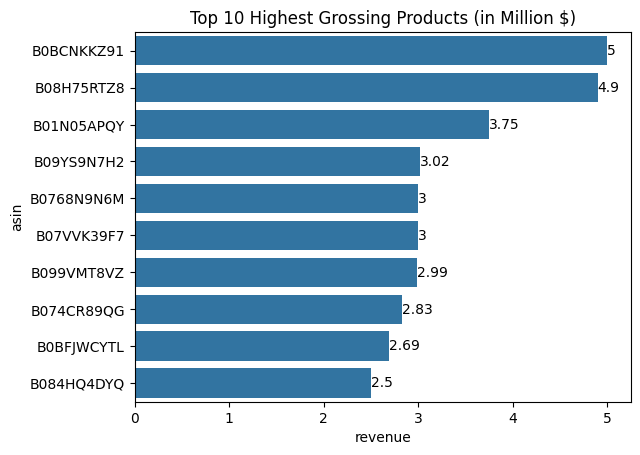

In [12]:
# Top 10 highest grossing products
top_10 = pro_df.sort_values(by=['revenue'],ascending=False)[:10]
MILLION = 10**6
top_10['revenue'] = np.round(top_10['revenue']/MILLION,2)
ax = sns.barplot(data = top_10,y='asin',x='revenue')
plt.title("Top 10 Highest Grossing Products (in Million $)")
ax.bar_label(ax.containers[0])
plt.show()


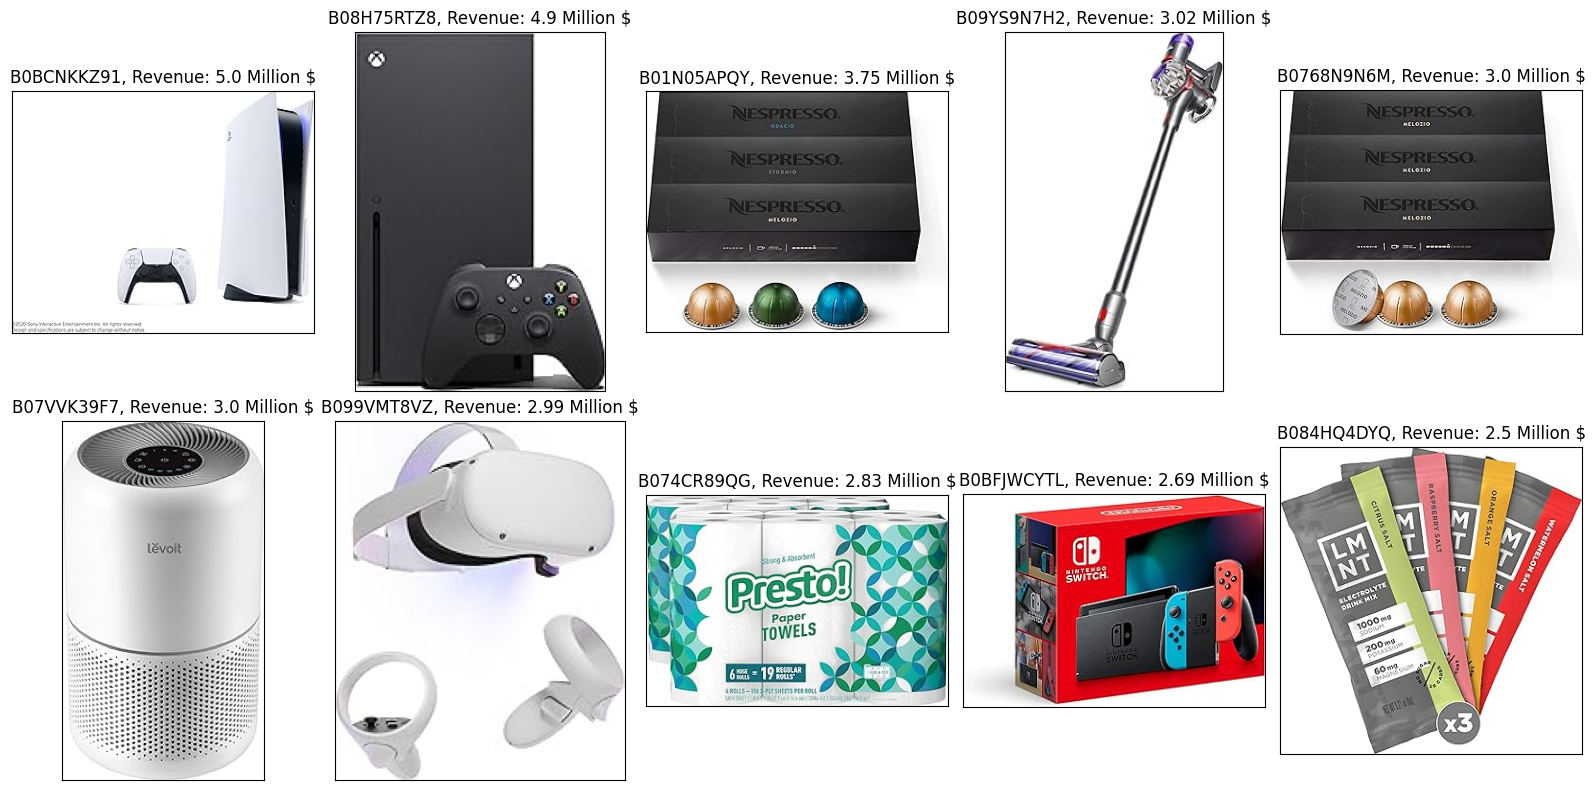

In [13]:
# Visualize Image
from PIL import Image
import urllib
image_urls = top_10.imgUrl.values.tolist()
image_asin = top_10.asin.values.tolist()
product_revenue = top_10['revenue'].values.tolist()

fig, ax = plt.subplots(2,5,figsize = (16,8))
ax = ax.flatten()
for i in range(len(top_10)):
    img_A = np.array(Image.open(urllib.request.urlopen(image_urls[i])))
    ax[i].imshow(img_A)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title(f"{image_asin[i]}, Revenue: {product_revenue[i]} Million $")
plt.tight_layout()
plt.show()

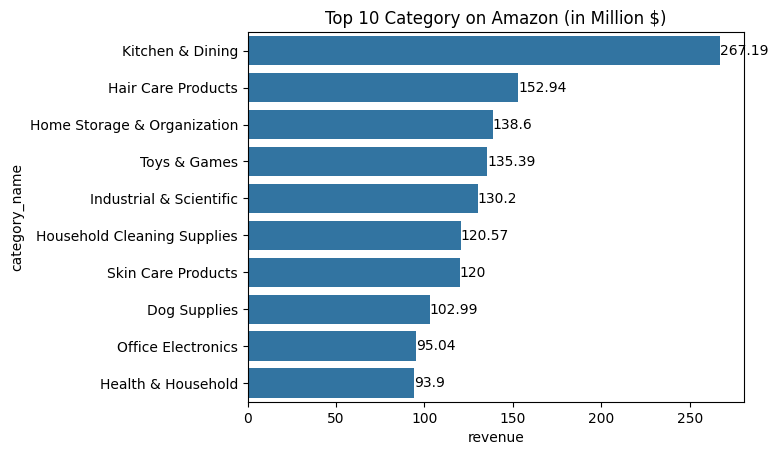

In [14]:
# Top 10 categories on Amazon
top_10_categories = pro_df.groupby(['category_id'])['revenue'].sum().reset_index().sort_values(by=['revenue'],ascending=False)[:10]
top_10_categories['revenue'] = np.round(top_10_categories['revenue']/MILLION,2)
top_10_categories = top_10_categories.merge(cate_df,on="category_id",how="left")
ax = sns.barplot(data = top_10_categories,y='category_name',x='revenue')
plt.title("Top 10 Category on Amazon (in Million $)")
ax.bar_label(ax.containers[0])
plt.show()

Conclusion:
Base on this analysis, if i have to choose a product to sell on Amazon, i will choose:
  - Products in Kitchen and Dining category
  - Electronics Products
  - Paper Towels or Household Cleaning Supplies

In [15]:
# Predicting the best selling products for the next year
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select relevant features (stars, reviews, prices, revenue) and target variable (isBestSeller)
X = pro_df[['stars','reviews', 'price','revenue']]
y = pro_df['isBestSeller']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model
accuracy_score(y_test,predictions)

0.9939495491958439

In [16]:
#Test the prediction
product_predictions = pd.DataFrame({'Asin': X_test.index.map(pro_df['asin']),
                                    'category_id': X_test.index.map(pro_df['category_id']),
                                    'IsBestSeller': y_test,
                                    'PredictedIsBestSeller': predictions})
product_predictions= product_predictions[product_predictions['PredictedIsBestSeller'] == True]
product_predictions['Count'] = 1
top_predict_categories = product_predictions.groupby(['category_id'])['Count'].sum().reset_index().sort_values(by=['Count'],ascending=False)[:10]
top_predict_categories = top_predict_categories.merge(cate_df,on="category_id",how="left")
top_predict_categories

,category_id,Count,category_name
0,167,13,Household Cleaning Supplies
1,170,11,Kitchen & Dining
2,136,6,Sports Nutrition Products
3,48,5,Makeup
4,135,5,Health & Household
5,255,5,Video Games
6,69,4,Televisions & Video Products
7,215,4,Tools & Home Improvement
8,175,3,Vacuum Cleaners & Floor Care
9,132,3,Diet & Sports Nutrition
